In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt

from random import shuffle
from skimage.io import imread
from skimage.transform import resize

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD, Adam, RMSprop
from tensorflow.keras.layers import Input, Dense, Flatten, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation

from functionsbone import*

In [6]:
img_w, img_h = 128, 128 # Setting the width and heights of the images.
data_path = 'DL_course_data/Lab1/Bone/' # Path to data root with two subdirs.
train_data_path = os.path.join(data_path, 'train')
test_data_path = os.path.join(data_path, 'test')
train_list = os.listdir(train_data_path)
test_list = os.listdir(test_data_path)

#creating the sets
x_train, x_test, y_train, y_test = get_train_test_arrays(train_data_path, test_data_path,train_list, test_list, img_h, img_w)

Reading: 0/1072 of train images
Reading: 100/1072 of train images
Reading: 200/1072 of train images
Reading: 300/1072 of train images
Reading: 400/1072 of train images
Reading: 500/1072 of train images
Reading: 600/1072 of train images
Reading: 700/1072 of train images
Reading: 800/1072 of train images
Reading: 900/1072 of train images
Reading: 1000/1072 of train images
Reading: 0/140 of train images
Reading: 100/140 of train images


In [12]:
lr = 0.00001
opt = Adam(learning_rate=lr)
batch_size = 8
n_epochs = 100
base_dense = 16
dr = 0.2
loss_function = 'binary_crossentropy'


In [13]:
def vg_model(img_ch, img_width, img_height):
    #blue layer
    model = Sequential()
    model.add(Conv2D(filters=base_dense, input_shape=(img_width, img_height, img_ch),
    kernel_size=(3,3), strides=(1,1), padding='same')) 
    model.add(Activation('relu'))
    model.add(Conv2D(filters= base_dense *2, kernel_size=(3,3), strides=(1,1), padding='same')) 
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    
    
    #orange layer
    model.add(Conv2D(filters= base_dense *2, kernel_size=(3,3), strides=(1,1), padding='same')) 
    model.add(Activation('relu'))
    model.add(Conv2D(filters= base_dense *2, kernel_size=(3,3), strides=(1,1), padding='same')) 
    model.add(Activation('relu'))
    model.add(Conv2D(filters= base_dense *2, kernel_size=(3,3), strides=(1,1), padding='same')) 
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    
    #purple layer
    model.add(Conv2D(filters= base_dense *4, kernel_size=(3,3), strides=(1,1), padding='same')) 
    model.add(Activation('relu'))
    model.add(Conv2D(filters= base_dense *4, kernel_size=(3,3), strides=(1,1), padding='same')) 
    model.add(Activation('relu'))
    model.add(Conv2D(filters= base_dense *4, kernel_size=(3,3), strides=(1,1), padding='same')) 
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    
    #green layer
    model.add(Conv2D(filters= base_dense *8, kernel_size=(3,3), strides=(1,1), padding='same')) 
    model.add(Activation('relu'))
    model.add(Conv2D(filters= base_dense *8, kernel_size=(3,3), strides=(1,1), padding='same')) 
    model.add(Activation('relu'))
    model.add(Conv2D(filters= base_dense *8, kernel_size=(3,3), strides=(1,1), padding='same')) 
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    
    #red layer
    model.add(Conv2D(filters= base_dense *8, kernel_size=(3,3), strides=(1,1), padding='same')) 
    model.add(Activation('relu'))
    model.add(Conv2D(filters= base_dense *8, kernel_size=(3,3), strides=(1,1), padding='same')) 
    model.add(Activation('relu'))
    model.add(Conv2D(filters= base_dense *8, kernel_size=(3,3), strides=(1,1), padding='same')) 
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    
    
    #dense layer
    model.add(Flatten()) 
    model.add(Dense(64))
    model.add(Dropout(dr))
    model.add(Activation('relu'))
    
    model.add(Dense(64)) 
    model.add(Dropout(dr))
    model.add(Activation('relu'))
    
    model.add(Dense(64))
    model.add(Dropout(dr))
    model.add(Activation('relu'))
    
    model.add(Dense(1))
    model.add(Dropout(dr))
    model.add(Activation('sigmoid'))
    
    
    model.summary() 
    return model

In [14]:
clf=vg_model(1,img_w, img_h)
clf.compile(loss=loss_function,optimizer = opt,metrics=['binary_accuracy'])
clf_hist=clf.fit(x_train,y_train,batch_size,n_epochs,validation_data=(x_test, y_test))

print("The predicted classes labels are:",clf.predict(x_train))


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_28 (Conv2D)           (None, 128, 128, 16)      160       
_________________________________________________________________
activation_36 (Activation)   (None, 128, 128, 16)      0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 128, 128, 32)      4640      
_________________________________________________________________
activation_37 (Activation)   (None, 128, 128, 32)      0         
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 64, 64, 32)        9248      
_________________________________________________________________
activation_38 (Activation)   (None, 64, 64, 32)       

1072/1072 [==============================] - 2s 2ms/sample - loss: 0.6768 - binary_accuracy: 0.5653 - val_loss: 0.6962 - val_binary_accuracy: 0.5071
Epoch 12/100
1072/1072 [==============================] - 2s 2ms/sample - loss: 0.6804 - binary_accuracy: 0.5541 - val_loss: 0.6951 - val_binary_accuracy: 0.5071
Epoch 13/100
1072/1072 [==============================] - 2s 2ms/sample - loss: 0.6759 - binary_accuracy: 0.5466 - val_loss: 0.6952 - val_binary_accuracy: 0.5071
Epoch 14/100
1072/1072 [==============================] - 2s 2ms/sample - loss: 0.6751 - binary_accuracy: 0.5662 - val_loss: 0.6996 - val_binary_accuracy: 0.5071
Epoch 15/100
1072/1072 [==============================] - 2s 2ms/sample - loss: 0.6753 - binary_accuracy: 0.5401 - val_loss: 0.6949 - val_binary_accuracy: 0.5071
Epoch 16/100
1072/1072 [==============================] - 2s 2ms/sample - loss: 0.6738 - binary_accuracy: 0.5513 - val_loss: 0.6969 - val_binary_accuracy: 0.5071
Epoch 17/100
1072/1072 [=================

1072/1072 [==============================] - 2s 2ms/sample - loss: 0.3191 - binary_accuracy: 0.8013 - val_loss: 0.2944 - val_binary_accuracy: 0.8357
Epoch 62/100
1072/1072 [==============================] - 2s 2ms/sample - loss: 0.3243 - binary_accuracy: 0.7882 - val_loss: 0.2839 - val_binary_accuracy: 0.8571
Epoch 63/100
1072/1072 [==============================] - 2s 2ms/sample - loss: 0.3259 - binary_accuracy: 0.7836 - val_loss: 0.3190 - val_binary_accuracy: 0.8071
Epoch 64/100
1072/1072 [==============================] - 2s 2ms/sample - loss: 0.3301 - binary_accuracy: 0.8078 - val_loss: 0.2821 - val_binary_accuracy: 0.8429
Epoch 65/100
1072/1072 [==============================] - 2s 2ms/sample - loss: 0.3206 - binary_accuracy: 0.7892 - val_loss: 0.2731 - val_binary_accuracy: 0.8357
Epoch 66/100
1072/1072 [==============================] - 2s 2ms/sample - loss: 0.2894 - binary_accuracy: 0.8162 - val_loss: 0.3011 - val_binary_accuracy: 0.8357
Epoch 67/100
1072/1072 [=================

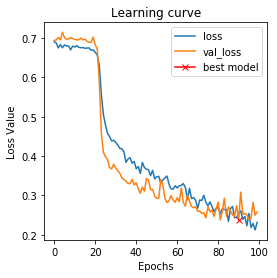

In [15]:
%matplotlib inline

plt.figure(figsize=(4, 4))
plt.title("Learning curve")
plt.plot(clf_hist.history["loss"], label="loss")
plt.plot(clf_hist.history["val_loss"], label="val_loss")
plt.plot( np.argmin(clf_hist.history["val_loss"]),
 np.min(clf_hist.history["val_loss"]),
 marker="x", color="r", label="best model")
plt.xlabel("Epochs")
plt.ylabel("Loss Value")
plt.legend(); 